# Séance 1 : Représentation de fonctions réelles à 1 et 2 variables

## Les paquets python de la séance

Les paquets utiles pour représenter des fonctions sont
* `matplotlib` qui permet de faire tout type de visualisation,
* `math` qui fournit les constantes et fonctions usuelles en maths,
* `numpy` qui permet de représenter les discrétisations sous forme de vecteurs (ou de matrices) et d'effectuer des opérations sur ces variables.

Il est préférable en python d'importer uniquement ce qui est utile, et de renommer le paquets avec leurs surnoms usuels dans la communauté. On évitera les imports massifs avec `*` qui, en plus de surcharger le système, ne permettent pas de distinguer des méthodes portant le même nom dans plusieurs paquets. Par exemple, il y a une fonction sinus `sin` à la fois dans `math` et dans `numpy`. 

Pour cette séance, on fait les imports suivants.

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi

## Représentation de la fonction sinus cardinal 

Rappelons que la fonction sinus cardinal est définie par $\operatorname{sinc}(x) = \dfrac{\sin(x)}x$ pour $x\neq0$ et $\operatorname{sinc}(0)=1$.

Nous allons voir différentes façons de définir la discrétisation de $x$ et différents rendus du tracé.

### Discrétisation de l'espace

Dans tous les cas, nous allons définir une valeur minimum $x_{\rm min}$ et une valeur maximum $x_{\rm max}$ de l'intervalle de définition (ou plutôt de tracé) de la fonction. Deux cas de figure se présentent :
* soit on se donne un nombre de points de discrétisation et on utilise `np.linspace`,
* soit on se donne un pas de discrétisation et on utilise `np.arange`.

Par défaut, le dernier point retourné par `np.linspace` est $x_{\rm max}$. Ceci peut être modifié avec l'argulment optionnel `endpoint = False`. On peut retourner le pas de discrétisation avec l'option `retstep = true`. 
Par défaut également, le type des éléments retournés est `float`.

En ce qui concerne `np.arange`, sauf si on a bien calculé son coup, il n'y a pas de raison que $x_{\rm max}$ soit le dernier point. Le type des données est induit du type des arguments de la fonction.

Liens : [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html#numpy.arange),
[linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy.linspace)

In [9]:
xmin, xmax = -10, 10
nbpoints = 101
dx = .2
x1 = np.linspace(xmin, xmax, nbpoints)
x2 = np.arange(xmin, xmax, dx)
print(f'x1 = {x1}')
print(f'x2 = {x2}')

x1 = [-10.   -9.8  -9.6  -9.4  -9.2  -9.   -8.8  -8.6  -8.4  -8.2  -8.   -7.8
  -7.6  -7.4  -7.2  -7.   -6.8  -6.6  -6.4  -6.2  -6.   -5.8  -5.6  -5.4
  -5.2  -5.   -4.8  -4.6  -4.4  -4.2  -4.   -3.8  -3.6  -3.4  -3.2  -3.
  -2.8  -2.6  -2.4  -2.2  -2.   -1.8  -1.6  -1.4  -1.2  -1.   -0.8  -0.6
  -0.4  -0.2   0.    0.2   0.4   0.6   0.8   1.    1.2   1.4   1.6   1.8
   2.    2.2   2.4   2.6   2.8   3.    3.2   3.4   3.6   3.8   4.    4.2
   4.4   4.6   4.8   5.    5.2   5.4   5.6   5.8   6.    6.2   6.4   6.6
   6.8   7.    7.2   7.4   7.6   7.8   8.    8.2   8.4   8.6   8.8   9.
   9.2   9.4   9.6   9.8  10. ]
x2 = [-1.00000000e+01 -9.80000000e+00 -9.60000000e+00 -9.40000000e+00
 -9.20000000e+00 -9.00000000e+00 -8.80000000e+00 -8.60000000e+00
 -8.40000000e+00 -8.20000000e+00 -8.00000000e+00 -7.80000000e+00
 -7.60000000e+00 -7.40000000e+00 -7.20000000e+00 -7.00000000e+00
 -6.80000000e+00 -6.60000000e+00 -6.40000000e+00 -6.20000000e+00
 -6.00000000e+00 -5.80000000e+00 -5.60000000e+00 -5

### Définition des valeurs de la fonction

Les fonctions de `numpy` peuvent s'appliquer à tous les éléments d'un tableau. 
Attention : il existe une fonction `sinc` dans `numpy` mais elle est définie différemment. 
Celle-ci a néanmoins l'avantage de bien se comporter si $x=0$.

Liens : [sin](https://numpy.org/doc/stable/reference/generated/numpy.sin.html),
[sinc](https://numpy.org/doc/stable/reference/generated/numpy.sinc.html)

In [10]:
y1_f = np.sin(x1) / x1
print(y1_f)

[-0.05440211 -0.03739583 -0.01815904  0.00263568  0.02422716  0.04579094
  0.06646786  0.08539501  0.10173797  0.11472324  0.12366978  0.12801838
  0.12735785  0.12144704  0.11023165  0.09385523  0.07266373  0.04720324
  0.01821081 -0.01340152 -0.04656925 -0.08010382 -0.11272619 -0.14310453
 -0.16989513 -0.19178485 -0.20753429 -0.21601978 -0.2162732  -0.20751804
 -0.18920062 -0.16101523 -0.12292235 -0.07515915 -0.01824192  0.04704
  0.11963863  0.19826976  0.28144299  0.36749837  0.45464871  0.54102646
  0.6247335   0.70389266  0.77669924  0.84147098  0.89669511  0.94107079
  0.97354586  0.99334665         nan  0.99334665  0.97354586  0.94107079
  0.89669511  0.84147098  0.77669924  0.70389266  0.6247335   0.54102646
  0.45464871  0.36749837  0.28144299  0.19826976  0.11963863  0.04704
 -0.01824192 -0.07515915 -0.12292235 -0.16101523 -0.18920062 -0.20751804
 -0.2162732  -0.21601978 -0.20753429 -0.19178485 -0.16989513 -0.14310453
 -0.11272619 -0.08010382 -0.04656925 -0.01340152  0.01821

/var/folders/h1/mv_zmsts2x127pwdmk4b7k5w0000gn/T/ipykernel_54060/4010905441.py:1: RuntimeWarning: invalid value encountered in divide
  y1_f = np.sin(x1) / x1


On utilise les erreurs d'arrondi dans `np.arange` qui font que le point 0 n'est pas exactement en 0 et donc ne génère pas de valeur non définie `nan`.

In [11]:
y2_f = np.sin(x2) / x2
print(y2_f)

[-0.05440211 -0.03739583 -0.01815904  0.00263568  0.02422716  0.04579094
  0.06646786  0.08539501  0.10173797  0.11472324  0.12366978  0.12801838
  0.12735785  0.12144704  0.11023165  0.09385523  0.07266373  0.04720324
  0.01821081 -0.01340152 -0.04656925 -0.08010382 -0.11272619 -0.14310453
 -0.16989513 -0.19178485 -0.20753429 -0.21601978 -0.2162732  -0.20751804
 -0.18920062 -0.16101523 -0.12292235 -0.07515915 -0.01824192  0.04704
  0.11963863  0.19826976  0.28144299  0.36749837  0.45464871  0.54102646
  0.6247335   0.70389266  0.77669924  0.84147098  0.89669511  0.94107079
  0.97354586  0.99334665  1.          0.99334665  0.97354586  0.94107079
  0.89669511  0.84147098  0.77669924  0.70389266  0.6247335   0.54102646
  0.45464871  0.36749837  0.28144299  0.19826976  0.11963863  0.04704
 -0.01824192 -0.07515915 -0.12292235 -0.16101523 -0.18920062 -0.20751804
 -0.2162732  -0.21601978 -0.20753429 -0.19178485 -0.16989513 -0.14310453
 -0.11272619 -0.08010382 -0.04656925 -0.01340152  0.01821

On peut aussi utiliser le vecteur généré par `np.linspace` et introduire un test vectoriel sur la valeur de l'argument. Par exemple, on peut implémenter la fonction suivante.

Liens : [where](https://numpy.org/doc/stable/reference/generated/numpy.where.html),
[finfo](https://numpy.org/doc/stable/reference/generated/numpy.finfo.html)

In [12]:
def mysinc(x):
    eps = np.finfo(float).eps
    y = np.where(x == 0, eps, x)
    return np.sin(y)/y

print(mysinc(x1))

[-0.05440211 -0.03739583 -0.01815904  0.00263568  0.02422716  0.04579094
  0.06646786  0.08539501  0.10173797  0.11472324  0.12366978  0.12801838
  0.12735785  0.12144704  0.11023165  0.09385523  0.07266373  0.04720324
  0.01821081 -0.01340152 -0.04656925 -0.08010382 -0.11272619 -0.14310453
 -0.16989513 -0.19178485 -0.20753429 -0.21601978 -0.2162732  -0.20751804
 -0.18920062 -0.16101523 -0.12292235 -0.07515915 -0.01824192  0.04704
  0.11963863  0.19826976  0.28144299  0.36749837  0.45464871  0.54102646
  0.6247335   0.70389266  0.77669924  0.84147098  0.89669511  0.94107079
  0.97354586  0.99334665  1.          0.99334665  0.97354586  0.94107079
  0.89669511  0.84147098  0.77669924  0.70389266  0.6247335   0.54102646
  0.45464871  0.36749837  0.28144299  0.19826976  0.11963863  0.04704
 -0.01824192 -0.07515915 -0.12292235 -0.16101523 -0.18920062 -0.20751804
 -0.2162732  -0.21601978 -0.20753429 -0.19178485 -0.16989513 -0.14310453
 -0.11272619 -0.08010382 -0.04656925 -0.01340152  0.01821

Bien sûr, la fonction `np.sinc` gère ce problème d'exception. Cependant il faut faire attention car la fonction définie comme le sinus cardinal dans la plupart des logiciels scientifiques est en fait la fonction $\operatorname{sinc}(\pi x)$. La raison vient des applications de cette fonction au traitement du signal. C'est la transformée de Fourier de la fonction porte :
\begin{equation*}
\Pi(x) = \begin{cases} 1 & \text{ si } |x|\leq \frac12 \\ 0 & \text{ ailleurs.} \end{cases}
\end{equation*}

In [13]:
y2 = np.sinc(x2 / pi)
print(y2)

[-0.05440211 -0.03739583 -0.01815904  0.00263568  0.02422716  0.04579094
  0.06646786  0.08539501  0.10173797  0.11472324  0.12366978  0.12801838
  0.12735785  0.12144704  0.11023165  0.09385523  0.07266373  0.04720324
  0.01821081 -0.01340152 -0.04656925 -0.08010382 -0.11272619 -0.14310453
 -0.16989513 -0.19178485 -0.20753429 -0.21601978 -0.2162732  -0.20751804
 -0.18920062 -0.16101523 -0.12292235 -0.07515915 -0.01824192  0.04704
  0.11963863  0.19826976  0.28144299  0.36749837  0.45464871  0.54102646
  0.6247335   0.70389266  0.77669924  0.84147098  0.89669511  0.94107079
  0.97354586  0.99334665  1.          0.99334665  0.97354586  0.94107079
  0.89669511  0.84147098  0.77669924  0.70389266  0.6247335   0.54102646
  0.45464871  0.36749837  0.28144299  0.19826976  0.11963863  0.04704
 -0.01824192 -0.07515915 -0.12292235 -0.16101523 -0.18920062 -0.20751804
 -0.2162732  -0.21601978 -0.20753429 -0.19178485 -0.16989513 -0.14310453
 -0.11272619 -0.08010382 -0.04656925 -0.01340152  0.01821

### Tracé des fonctions

La fonction la plus simple pour tracer une fonction est `plt.plot`. On peut lui adjoindre un large jeu d'arguments pour paramétrer le tracé. Les méthodes `plt.xlabel`, `plt.ylabel` et `plt.title` permettent de préciser la signification des axes des abcisses et des ordonnées et de donner un titre au graphe. Le paramètre `label` est une manière élégante d'associer à chaque courbe sa signification dont l'affichage se fait grâce à `plt.legend`.

Pour ne tracer que quelques points, on définira aussi une discrétisation très large.

Lien : [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

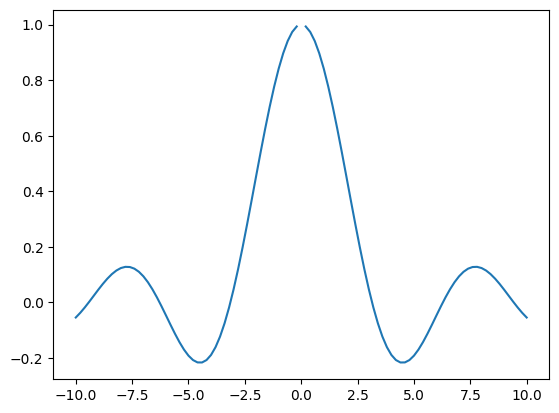

In [14]:
x3 = np.linspace(xmin, xmax, 21)
y3 = np.sinc(x3 / pi)

plt.plot(x1, y1_f);

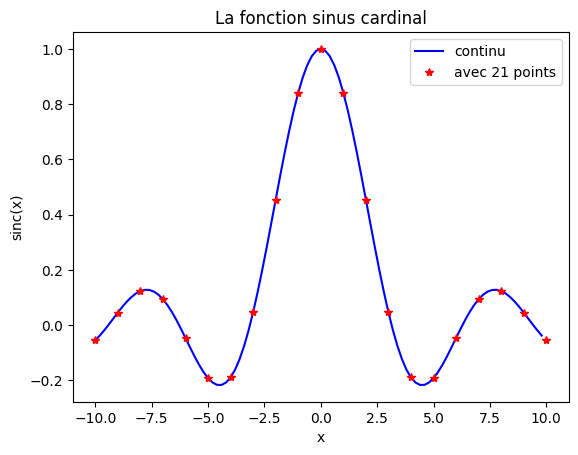

In [15]:
plt.plot(x2, y2, 'b', label='continu')
plt.plot(x3, y3, 'r*', label='avec 21 points')
plt.xlabel('x')
plt.ylabel('sinc(x)')
plt.title('La fonction sinus cardinal')
plt.legend()

## Représentation d'une surface

On considère la fonction 
\begin{equation}
f(x,y) = x^3 + 3xy^2 - 15 x - 12 y.
\end{equation}

In [16]:
def f(x, y):
    return x*x*x + 3*x*y*y - 15*x - 12*y

### Tracé de surface et de lignes de niveau

Pour la discrétisation d'une surface, il faut définir les points de discrétisation dans les deux directions, typiquement avec `np.linspace`, puis ensuite définir grâce à `np.meshgrid` deux matrices donnant respectivement les abscisses et les ordonnées de tous les points. 

On décide de tracer deux figures côte-à-côte, ce qui se fait avec `plt.subplots`.
On affiche la surface sur les axes courants (obtenus avec `plt.gca`) avec la méthode `plot_surface`.
L'échelle des couleurs est associée à cette surface en utilisant `plt.colorbar`. 
Le choix des couleurs peut par exemple se définir avec `plt.get_cmap`.

Pour les lignes de niveau, on utilise la fonction `plt.contour` pour laquelle on peut préciser les valeurs des contours à dessiner. 
On peut utiliser `plt.clabel` pour identifier les valeurs associées à chaque niveau.
On peut comme pour les surfaces choisir la gamme de couleurs utilisées.

Liens : [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html),
[subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html),
[gca](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.gca.html),
[colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html),
[colorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html),
[contour](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html),
[clabel](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.clabel.html)

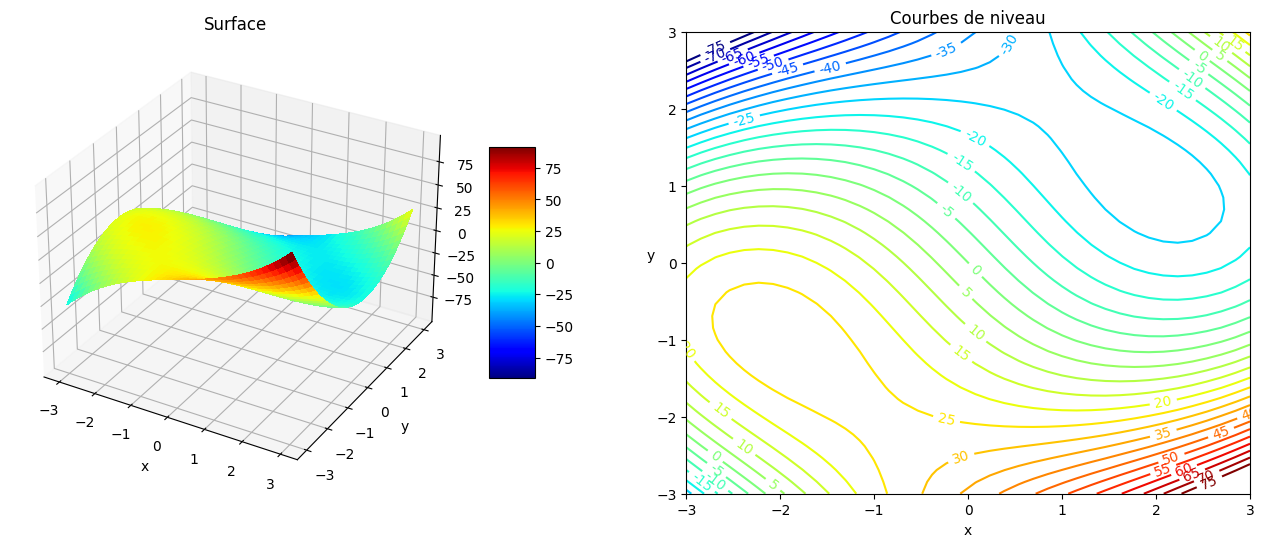

In [17]:
xmin, xmax = -3, 3
ymin, ymax = -3, 3
# X et Y comme vecteurs
x = np.linspace(xmin, xmax, 40)
y = np.linspace(ymin, ymax, 40)
# X et Y comme matrices
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
cmap = plt.get_cmap('jet')

plt.figure(1,figsize=(16,6))
plt.subplot(1,2,1,projection='3d')
ax = plt.gca()
surff = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                               cmap=cmap, linewidth=0, antialiased=False)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(surff, shrink=0.5, aspect=5)
plt.title('Surface')
plt.subplot(1,2,2)
cont = plt.contour(X, Y, Z, np.linspace(-75,75,31), cmap=cmap)
plt.clabel(cont, fmt='%d')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.title('Courbes de niveau');